### The Project and the Content of the Dataset
This project analyzes a wines dataset. It is publicly available through the University of California Irvine UCI
Machine Learning repository [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Wine). The dataset consists of 178 wine samples/row of records with 13 features/columns describing their different chemical properties.  

Each of the 177 Italian wine samples are from 3 different cultivars (labelled 1,2,3) which in our case we shall be calling Class labels. The sample of wines have characteristics in the form of chemical composition totaling to 13 compounds with a Class label to identify them so the total number of columns are 14. Lets look at the columns: 


1.  Class label,
2.  Alcohol,
3.  Malic acid,
4.  Ash,
5.  Alcalinity of ash,
6.  Magnesium,
7.  Total phenols,
8.  Flavanoids,
9.  Nonflavanoid phenols,
10. Proanthocyanins,
11. Color intensity,
12. Hue,
13. OD280/OD315 of diluted wines,
14. Proline

The Class label is categorical in nature; it has Class label types 1,2,3. However, these are in numerical format. The rest of the columns are given in numerical values and are either floating point numbers or integers. 

The remote location for the datases is https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
This can replace the url in our data processing section as The sample dataset was downloaded from the UCI repository and loaded from my local machine.

### Disclaimer: Use a combination of (shift+enter/return) to move through cells

### Research Questions

The purpose for using this dataset is answer a few questions about it: 
1. Can we identify a Class label or Cultivar by its dominant attribute?
2. Is it possible to predict the Cultivar of a wine by analyzing its chemical features? 
3. Out of our models, which one gives the best prediction accuracy?

Importing libraries that will assist in answering the questions.

### Libraries for Data Analysis and Machine Learning models. 

Some of the libararies we will use are listed below. 

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib
import seaborn as sns
import scipy.stats
import scipy.stats as stats

%matplotlib inline

### Description of the tools
1. numpy: handles arrays and collection of high-level mathematical functions for them,
2. scipy: Scientific computing utilities (linalg, FFT, signal/imageprocessing...)
3. sklearn: Scientific tool for Machine learning featuring various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means etc.
4. matplotlib: Plotting and visualization: a python package to view or present data in a pictorial or graphical format.
5. pandas: provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
6. seaborn: for visualization. Seaborn is a Python data visualization library based on matplotlib
7. scipy: Python library for scientific computing and technical computing. 

## Data Processing
Creating a pandas dataframe and storing the dataset in the dataframe. A DataFrame is a 2-Dimensional data structure. It is used when you want to represent tabular data in the form of features and samples, commonly referred to as columns and rows respectively.

In [572]:
# Loading the data from it's csv,
# the url is in our local machine replace with the remote url 
# remote url: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
url = 'wine/wine.data'
wine_df= pd.read_csv(url)

### Exploring our Data (EDA)

The next step is to find out some details like the datatypes of our dataset. 

The .info() method returns the datatpes for each rows based on the column headers. 

In [573]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
1        177 non-null int64
14.23    177 non-null float64
1.71     177 non-null float64
2.43     177 non-null float64
15.6     177 non-null float64
127      177 non-null int64
2.8      177 non-null float64
3.06     177 non-null float64
.28      177 non-null float64
2.29     177 non-null float64
5.64     177 non-null float64
1.04     177 non-null float64
3.92     177 non-null float64
1065     177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


### Output analysis
As can be seen in the output above,the info() method returns the datatypes for our dataset. 

The data has no headers or column names for its records. But will be added in the next task. 

The int64 datatype represents integer values or data types while the float64 reperesents floating point numerical values. 

<b>NB</b>. The dataset attributes are defined in the repository. And NOT in the dataset. We are going to define them in our dataframe. 
The attributes are:

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

credits: (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )

In [574]:
#Defining the columns for the dataset as listed in the repository.

wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

#our class label is nominal, we define it as such using the .astype(str) 

wine_df['Class label'] = wine_df['Class label'].astype(str)

Here, we add the column names for our samples. The first <b>'Class label'</b> identifies with the first column and so on. Now let us glance into our dataset and see the changes to the initial call. Using .info() method.  

In [575]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
Class label                     177 non-null object
Alcohol                         177 non-null float64
Malic acid                      177 non-null float64
Ash                             177 non-null float64
Alcalinity of ash               177 non-null float64
Magnesium                       177 non-null int64
Total phenols                   177 non-null float64
Flavanoids                      177 non-null float64
Nonflavanoid phenols            177 non-null float64
Proanthocyanins                 177 non-null float64
Color intensity                 177 non-null float64
Hue                             177 non-null float64
OD280/OD315 of diluted wines    177 non-null float64
Proline                         177 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 19.5+ KB


We have features to identify our samples with. The <b>Class label</b> is of great significance because this is what we are aiming to use in various parts of our research questions. We changed its datatype from int64 to an 'object' datatype of our dataset.

The Class label is not numeric, its ordinal and it is representing the type of Cultivar that makes the wine. 

Now let us glance into our dataset and retreive features and samples of the data. The .head() method is used in this case, a Python Pandas way of returning the first five records from data.

In [576]:
#The .head() method returns the five rows of data from our DataFrame 'wine_df'
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


#### The output
We can see the 13 different columns (features) in our dataset retrieved from the first five samples. The columns describe the chemical properties of each of the 178 wine samples indexed 0-177. Our dataset has three unique class labels which denotes the different types of grape the wines was produced from, as show from the output below:

In [577]:
print('Class labels', np.unique(wine_df['Class label']))

Class labels ['1' '2' '3']


### Data Filtering
Pandas is a Python library for data analysis. Pandas offers the <b>.loc</b> method for convenient data filtering. <b>loc</b> uses labels for data filtering, this means that you can select data using the column or row headers in the dataset. Let's apply some filtering on the data. 

#### Finding all the rows that meet a condition in a column
Here we try to find the rows where the value of <b> Alcalinity of ash </b> is greater or equal to 20. We also return the first 5 rows from the dataset with the <b>.head()</b> method.

The <b>.head()</b> method is applied to the result of the loc method. 

In [578]:
wine_df.loc[wine_df['Alcalinity of ash'] >= 20].head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
15,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
16,1,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
23,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
24,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


#### Find all the rows that meet a set of two conditions

Here the rows with <b> Alcalinity of ash</b> is less than or equal to 20 and  and the <b> Total phenols</b> is greater or equal to 2.00 returns the first 5 rows from the dataset with the <b>.head()</b> method.

Like the previous action above, result of the loc method is stored in the new DataFrame <b>df1</b>. The <b>.head()</b> method is applied on the new DataFrame formed. 

In [579]:
wine_df.loc[(wine_df['Alcalinity of ash'] <= 20) & (wine_df['Total phenols'] >=2.00)].head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


#### Descriptive Statistical Techniques

    This section will describe basic features of the dataset.
    A summary of the sample and measures of the dataset will be described. Python has a myriad of tools for statistical analysis and pandas is one such tool. Pandas is a library for analysis of data. It provides many inbuilt functions for for loading data and performing statistical analysis on the dataset. 

#### Describing the WINE dataset

    The Pandas library will be used for data analaysis. It provides high-performance, easy-to-use data structures and data analysis tools.
    Pandas has a .describe() method that is applied to a dataframe which then returns a statistical summary of the dataset. When the argument 'include="all" is added, the method returns a full summary statistics. 

The <b>wine_df</b> dataframe created earlier is ready for use in our analysis. It contains the records of the dataset and makes analysis using Python's panda library easy.

In [580]:
wine_df.describe(include="all")

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,NaN,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,NaN,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,NaN,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,NaN,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,NaN,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000


#### The output
    The statistical summary is produced in the output above. Showing different measures like mean, standard deviation among others for each of the features of the wine dataset. 

### Frequency distribution of categorical values.

    The different grape types in the dataset repesent categorical data in ordinal form. They are therefore labelled 1,2,3. We can find out how many rows in our dataset has each type of grape by count (number). The <b>.value_counts</b> method returns the samples' number of occurences for the values in the col_name

In [581]:
# Frequency distribution of cultivar
col_name = wine_df['Class label'].value_counts()
#print(wine_df[col_name].value_counts(),"\n")   
col_name

2    71
1    58
3    48
Name: Class label, dtype: int64

    The output shows that cultivar-2 has the most samples (71) while cultivar-3 is the least with 48 samples. 

### Sorting data
Python also provides built in function to sort data. The sort function can be used to sort the list in both ascending and descending order. We will sort our data in descending, and set the <b> by</b> attribute to Proline and to sort in descending order <b> ascending</b> attribute is set to False.

In [582]:
#Sorting by feature 'Proline'
wine_df.sort_values(by = 'Proline', ascending = False).head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
17,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
13,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
30,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


### Descriptive Statistics

This section we will do descriptive statistics summarizes our dataset and give summaries of measures of central tendency (mean, median, and mode) and measures of variability (standard deviation, minimum/maximum values).

Python DataFrame groupBy() splits categorical data into groups based on some criteria given. The categorical data we are using in this case is the Class label identifies samples in groups by cultivar.  

In [583]:
classLbl = wine_df.groupby('Class label').mean()
classLbl

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [584]:
classLbl = wine_df.groupby('Class label').median()
classLbl

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,13.745,1.770,2.445,16.9,103.5,2.825,2.975,0.29,1.865,5.40,1.070,3.135,1095.0
2,12.290,1.610,2.240,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.830,495.0
3,13.165,3.265,2.380,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.660,627.5


In [585]:
classLbl = wine_df.groupby('Class label').min()
classLbl

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,12.85,1.35,2.04,11.2,89,2.20,2.19,0.17,1.25,3.52,0.82,2.51,680
2,11.03,0.74,1.36,10.6,70,1.10,0.57,0.13,0.41,1.28,0.69,1.59,278
3,12.20,1.24,2.10,17.5,80,0.98,0.34,0.17,0.55,3.85,0.48,1.27,415


In [586]:
classLbl = wine_df.groupby('Class label').max()
classLbl

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,14.83,4.04,3.22,25.0,132,3.88,3.93,0.50,2.96,8.9,1.28,4.00,1680
2,13.86,5.80,3.23,30.0,162,3.52,5.08,0.66,3.58,6.0,1.71,3.69,985
3,14.34,5.65,2.86,27.0,123,2.80,1.57,0.63,2.70,13.0,0.96,2.47,880


In [587]:
classLbl = wine_df.groupby('Class label').std()
classLbl

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,0.461632,0.693400,0.229124,2.561375,10.224654,0.341880,0.400831,0.070648,0.412419,1.249301,0.117463,0.345504,223.352764
2,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
3,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.124140,0.408836,2.310942,0.114441,0.272111,115.097043


### Determining Min, Max for entire sample Features

In [588]:
# first we retrieve the column names with datatypes floating point and integer values of our dataset. 
xy = wine_df.select_dtypes(include = ['float64', 'int64'])
xy.head(5)

#retreive the names for the columns
#list(xy.columns.values)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [589]:
# Alcohol 
print("1: Alcohol")
print("min = ", xy['Alcohol'].min())
print("max = ",xy['Alcohol'].max()) 
print("\n")

# Malic acid
print("2: Malic acid")
print("min =",xy['Malic acid'].min())
print("max =",xy['Malic acid'].max())
print("\n")

#Ash
print("3: Ash")
print("min =",xy['Ash'].min())
print("max =",xy['Ash'].max())
print("\n")

# Alcalinity of ash
print("4: Alcalinity of ash")
print("min =",xy['Alcalinity of ash'].min())
print("max =",xy['Alcalinity of ash'].max())
print("\n")

# Magnesium
print("5: Magnesium")
print("min =",xy['Magnesium'].min())
print("max =",xy['Magnesium'].max())
print("\n")

# Total phenols
print("6: Total phenols")
print("min =",xy['Total phenols'].min())
print("max =",xy['Total phenols'].max())
print("\n")

# Flavanoids
print("7: Flavanoids")
print("min =",xy['Flavanoids'].min())
print("max =",xy['Flavanoids'].max())
print("\n")

# Nonflavanoid phenols
print("8: Nonflavanoid phenols")
print("min =",xy['Nonflavanoid phenols'].min())
print("max =",xy['Nonflavanoid phenols'].max())
print("\n")

# Proanthocyanins 
print("9: Proanthocyanins")
print("min =",xy['Proanthocyanins'].min())
print("max =",xy['Proanthocyanins'].max())
print("\n")

# Color intensity 
print("10: Color intensity ")
print("min =",xy['Color intensity'].min())
print("max =",xy['Color intensity'].max())
print("\n")

# Fuel_efficiency
print("11: Hue")
print("min =",xy['Hue'].min())
print("max =",xy['Hue'].max())
print("\n")

# 
print("12: OD280/OD315 of diluted wines")
print("min =",xy['OD280/OD315 of diluted wines'].min())
print("max =",xy['OD280/OD315 of diluted wines'].max())
print("\n")

# Proline
print("13: Proline")
print("min =",xy['Proline'].min())
print("max =",xy['Proline'].max())
print("\n")

1: Alcohol
min =  11.03
max =  14.83


2: Malic acid
min = 0.74
max = 5.8


3: Ash
min = 1.36
max = 3.23


4: Alcalinity of ash
min = 10.6
max = 30.0


5: Magnesium
min = 70
max = 162


6: Total phenols
min = 0.98
max = 3.88


7: Flavanoids
min = 0.34
max = 5.08


8: Nonflavanoid phenols
min = 0.13
max = 0.66


9: Proanthocyanins
min = 0.41
max = 3.58


10: Color intensity 
min = 1.28
max = 13.0


11: Hue
min = 0.48
max = 1.71


12: OD280/OD315 of diluted wines
min = 1.27
max = 4.0


13: Proline
min = 278
max = 1680




#### Mean, Mode, Standard Deviation & Correlation for Features

In [590]:
# Alcohol 
print("1: Alcohol")
print("mean =",xy['Alcohol'].mean())
print("mode =",xy['Alcohol'].mode()) 
print("std =",xy['Alcohol'].std()) 
print("\n")

# Malic acid
print("2: Malic acid")
print("mean =",xy['Malic acid'].mean())
print("mode =",xy['Malic acid'].mode()) 
print("std =",xy['Malic acid'].std()) 
print("\n")

#Ash
print("3: Ash")
print("mean =",xy['Ash'].mean())
print("mode =",xy['Ash'].mode()) 
print("std =",xy['Ash'].std()) 
print("\n")

# Alcalinity of ash
print("4: Alcalinity of ash")
print("mean =",xy['Alcalinity of ash'].mean())
print("mode =",xy['Alcalinity of ash'].mode()) 
print("std =",xy['Alcalinity of ash'].std()) 
print("\n")

# Magnesium
print("5: Magnesium")
print("mean =",xy['Magnesium'].mean())
print("mode =",xy['Magnesium'].mode()) 
print("std =",xy['Magnesium'].std()) 
print("\n")

# Total phenols
print("6: Total phenols")
print("mean =",xy['Total phenols'].mean())
print("mode =",xy['Total phenols'].mode()) 
print("std =",xy['Total phenols'].std()) 
print("\n")

# Flavanoids
print("7: Flavanoids")
print("mean =",xy['Flavanoids'].mean())
print("mode =",xy['Flavanoids'].mode()) 
print("std =",xy['Flavanoids'].std()) 
print("\n")

# Nonflavanoid phenols
print("8: Nonflavanoid phenols")
print("mean =",xy['Nonflavanoid phenols'].mean())
print("mode =",xy['Nonflavanoid phenols'].mode()) 
print("std =",xy['Nonflavanoid phenols'].std()) 
print("\n")

# Proanthocyanins 
print("9: Proanthocyanins")
print("mean =",xy['Proanthocyanins'].mean())
print("mode =",xy['Proanthocyanins'].mode()) 
print("std =",xy['Proanthocyanins'].std()) 
print("\n")

# Color intensity 
print("10: Color intensity ")
print("mean =",xy['Color intensity'].mean())
print("mode =",xy['Color intensity'].mode()) 
print("std =",xy['Color intensity'].std()) 
print("\n")

# Fuel_efficiency
print("11: Hue")
print("mean =",xy['Hue'].mean())
print("mode =",xy['Hue'].mode()) 
print("std =",xy['Hue'].std()) 
print("\n")

# 
print("12: OD280/OD315 of diluted wines")
print("mean =",xy['OD280/OD315 of diluted wines'].mean())
print("mode =",xy['OD280/OD315 of diluted wines'].mode()) 
print("std =",xy['OD280/OD315 of diluted wines'].std()) 
print("\n")

# Proline
print("13: Proline")
print("mean =",xy['Proline'].mean())
print("mode =",xy['Proline'].mode()) 
print("std =",xy['Proline'].std()) 
print("\n")

1: Alcohol
mean = 12.993672316384174
mode = 0    12.37
1    13.05
dtype: float64
std = 0.8088084424378916


2: Malic acid
mean = 2.339887005649717
mode = 0    1.73
dtype: float64
std = 1.119314415116238


3: Ash
mean = 2.3661581920903965
mode = 0    2.28
1    2.30
dtype: float64
std = 0.2750804383454942


4: Alcalinity of ash
mean = 19.516949152542374
mode = 0    20.0
dtype: float64
std = 3.336071070121235


5: Magnesium
mean = 99.58757062146893
mode = 0    88
dtype: int64
std = 14.174018455548271


6: Total phenols
mean = 2.29225988700565
mode = 0    2.2
dtype: float64
std = 0.6264650830308146


7: Flavanoids
mean = 2.023446327683615
mode = 0    2.65
dtype: float64
std = 0.9986576153088098


8: Nonflavanoid phenols
mean = 0.36231638418079104
mode = 0    0.26
1    0.43
dtype: float64
std = 0.12465293369095114


9: Proanthocyanins
mean = 1.586949152542374
mode = 0    1.35
dtype: float64
std = 0.5715447197884235


10: Color intensity 
mean = 5.0548022542372895
mode = 0    2.6
1    3.8
2 

### Correlation of Features
Correlation is a statistical technique which tells us how strongly the pair of variables are linearly related and change together. It does not tell us the 'why' and 'how' behind the relationship but it just says the relationship exists. <b> Example</b> : Correlation between Ice cream sales and sunglasses sold. 

Correlation measures the extent to which variables are independent. It helps know how one variable affects the other. However, it does not imply causation. 

Source credits: [towardsdatascience](https://towardsdatascience.com/why-correlation-does-not-imply-causation-5b99790df07e)

#### Correlation Matrix
The correlation function .corr() uses Pearson correlation coefficient, which results in a number
between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1
and a strong positive correlation is indicated by a coefficient toward 1.

The correlation matrix is a square matrix that contains the Pearson product-
moment correlation coefficient (often abbreviated as Pearson's r), which measure
the linear dependence between pairs of features. The correlation coefficients are in
the range -1 to 1.

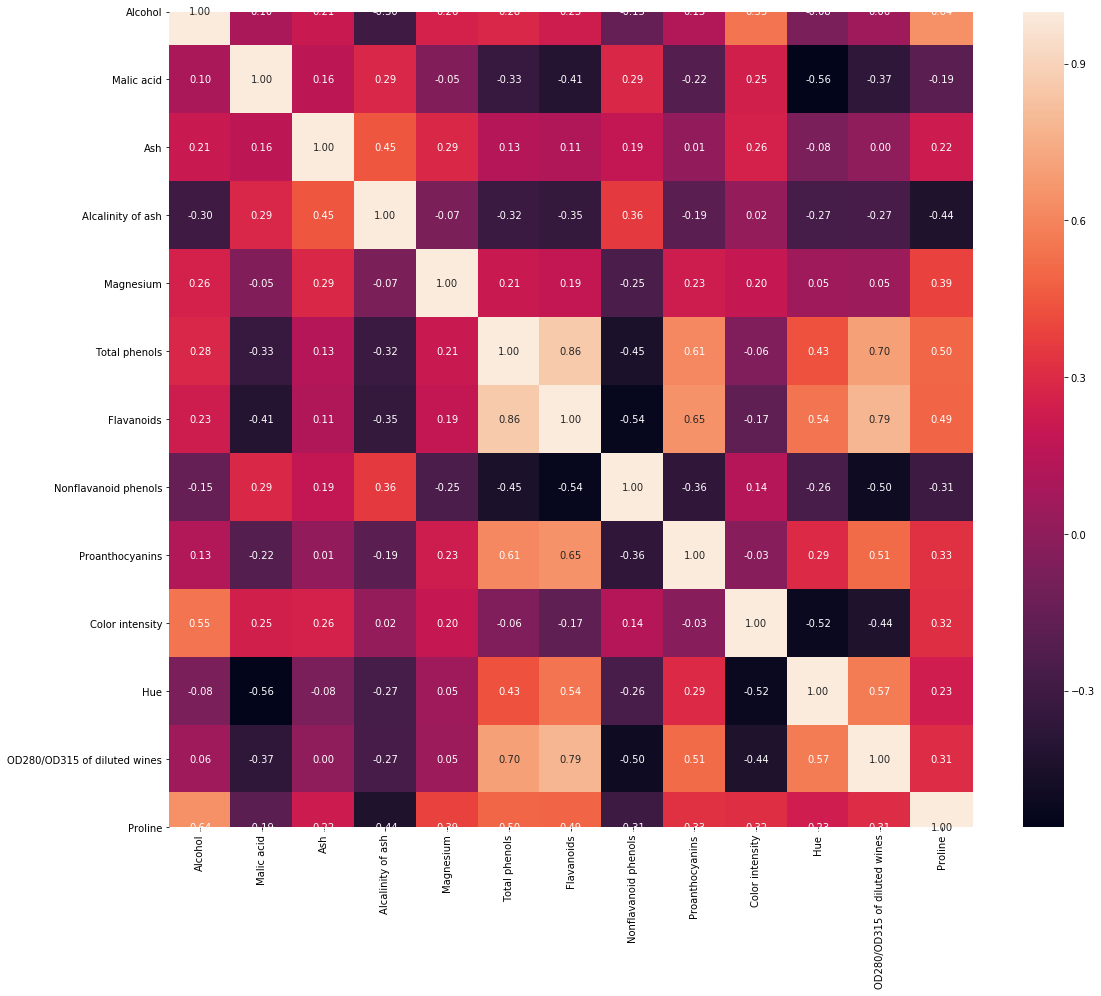

In [591]:
# Correlation in a single Heatmap fitted with values to the nearest s significant figures
plt.figure(figsize=(18,15))
sns.heatmap(wine_df.corr(), annot=True, fmt=".2f");

This correlation heat map gives us a visualization of how different features are correlated. A strong positive correlation is seen between <b> Flavanoids</b> and <b> Total phenois </b> at 0.86 is the highest positive correlation.  A moderately strong negative correlation from the heatmap shows <b>Malic acid</b> and <b>hue</b> at -0.56.

## Data Visualizations

Statistical data requires some form of visual aid. The is done by visualizations. Data visualization involves presenting data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns. 
(credits: [Wikipedia](https://en.wikipedia.org/wiki/Data_visualization))


### Different features visualization
Pair plot is a kind of scatter plot. It requires only for two features at a time. Pair plot is good for small amout of features and for first glance at the columns (features).

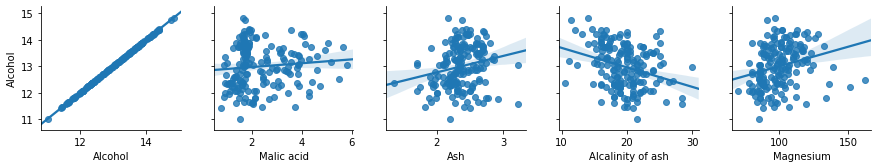

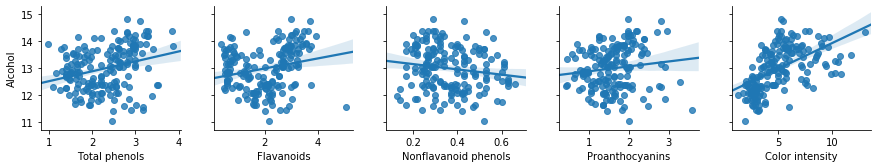

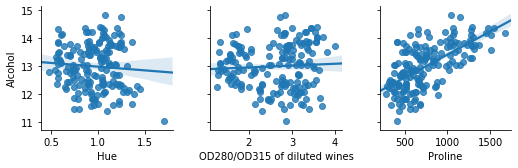

In [592]:
#The visualization of the all features against alcohol.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Alcohol', x_vars = xy.columns[i:i+5],kind="reg" )

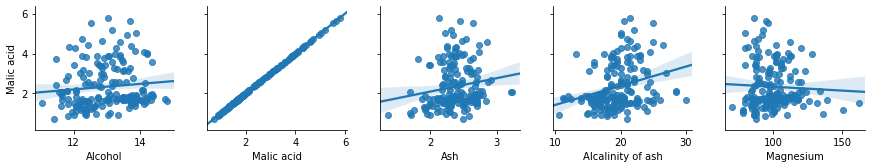

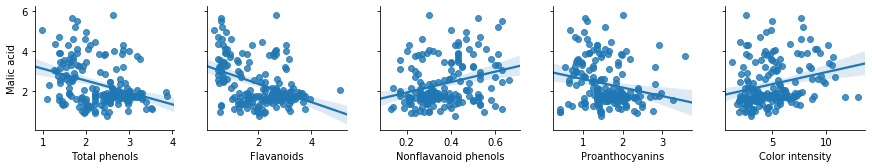

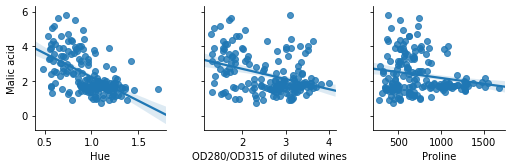

In [593]:
#The visualization of the all features against Malic acid.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Malic acid', x_vars = xy.columns[i:i+5],kind="reg" )

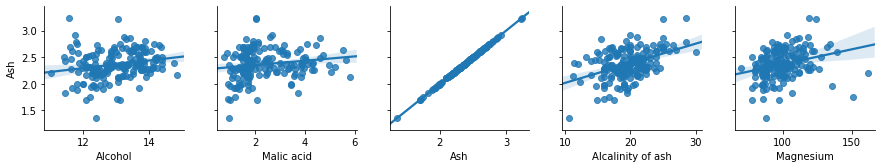

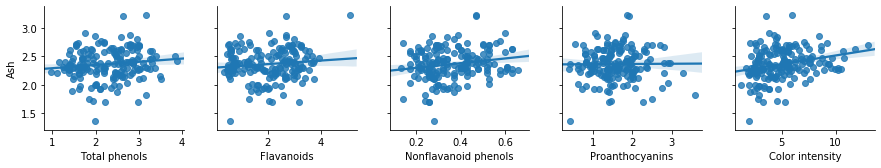

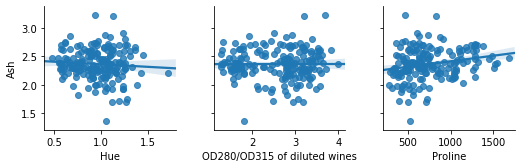

In [594]:
#The visualization of the all features against Ash
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Ash', x_vars = xy.columns[i:i+5],kind="reg" )

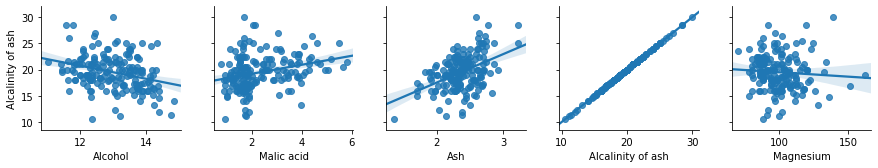

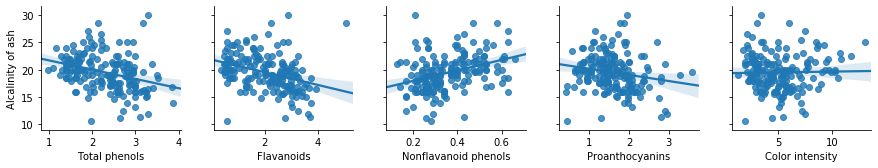

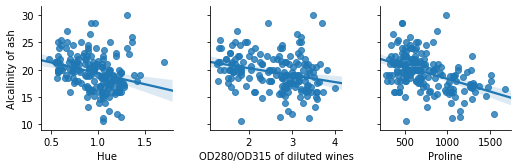

In [595]:
#The visualization of the all features against Alcalinity of ash.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Alcalinity of ash', x_vars = xy.columns[i:i+5],kind="reg" )

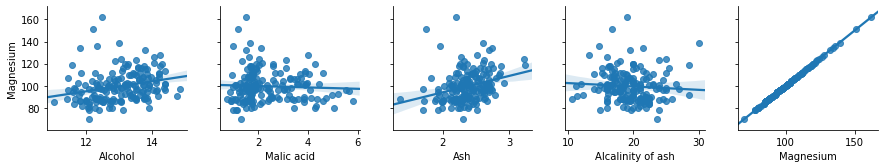

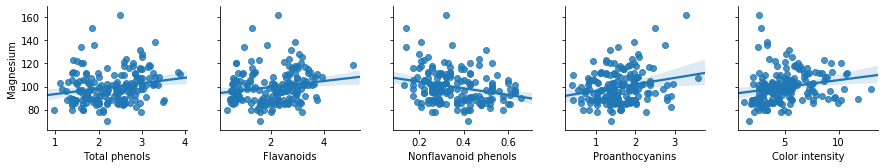

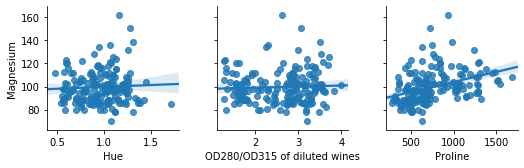

In [596]:
#The visualization of the all features against Magnesium.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Magnesium', x_vars = xy.columns[i:i+5],kind="reg" )

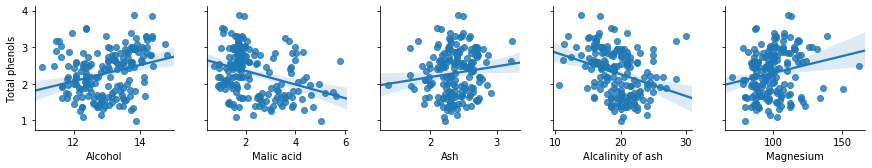

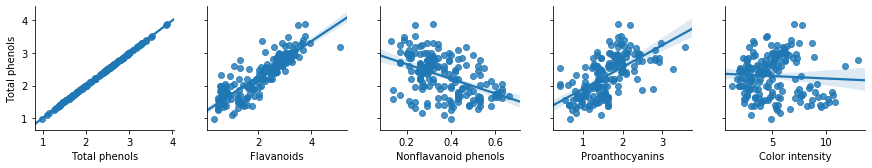

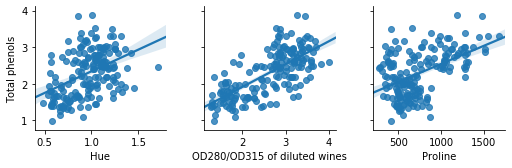

In [597]:
#The visualization of the all features against Total phenols.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Total phenols', x_vars = xy.columns[i:i+5],kind="reg" )

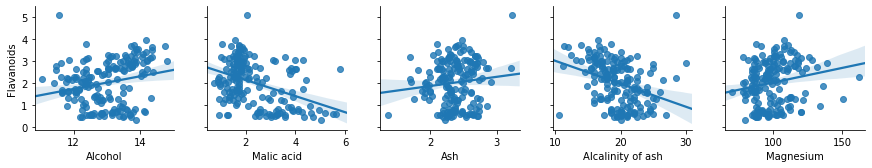

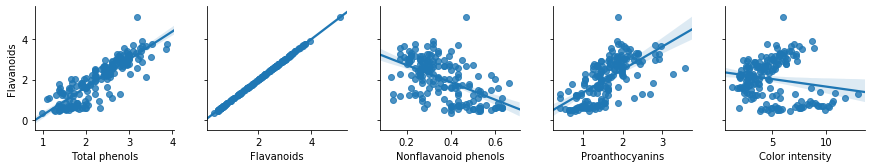

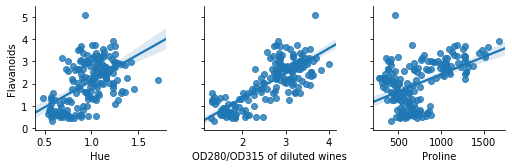

In [598]:
#The visualization of the all features against Flavanoids.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Flavanoids', x_vars = xy.columns[i:i+5],kind="reg" )

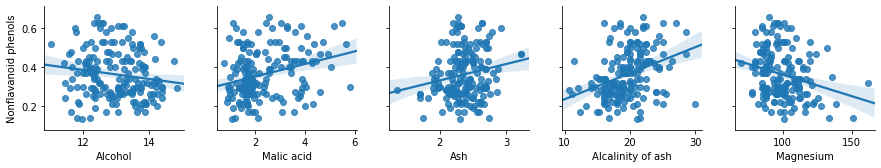

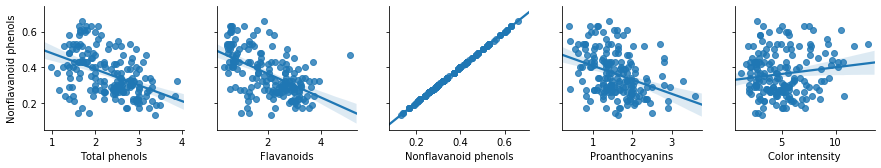

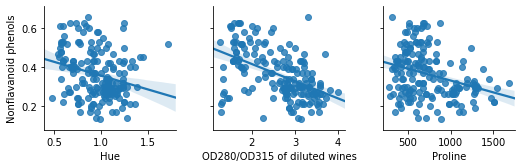

In [599]:
#The visualization of the all features against Nonflavanoid phenols.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Nonflavanoid phenols', x_vars = xy.columns[i:i+5],kind="reg" )

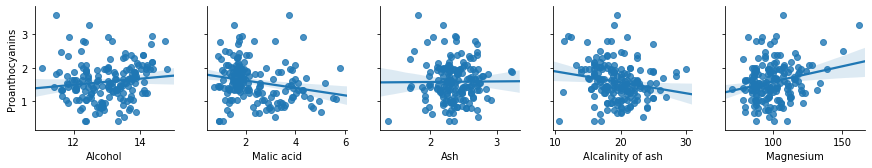

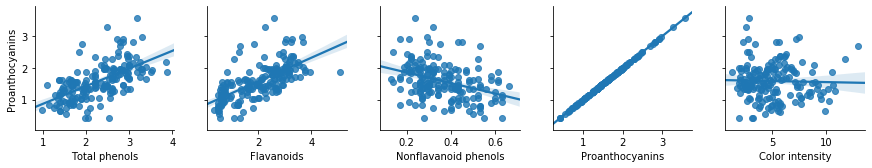

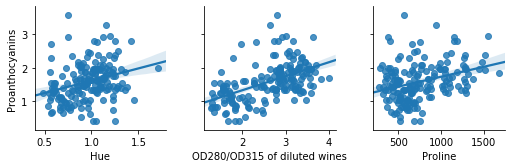

In [600]:
#The visualization of the all features against Proanthocyanins.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Proanthocyanins', x_vars = xy.columns[i:i+5],kind="reg" )
    

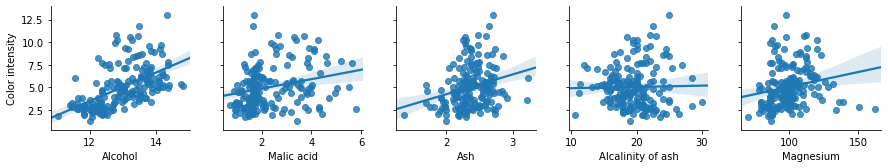

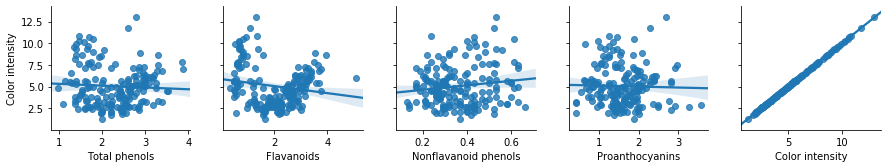

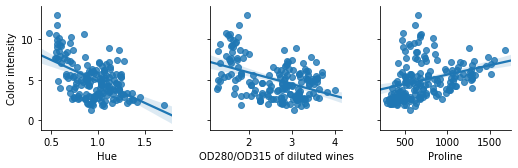

In [601]:
#The visualization of the all features against Color intensity.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Color intensity', x_vars = xy.columns[i:i+5],kind="reg" )

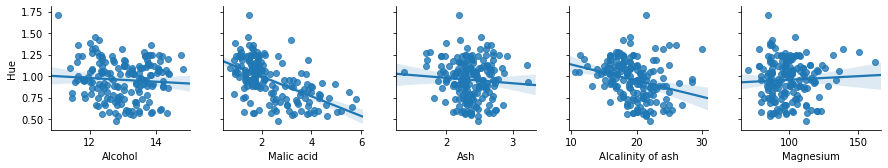

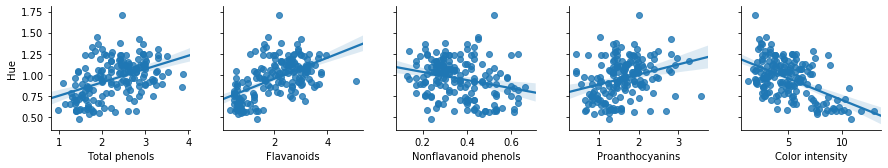

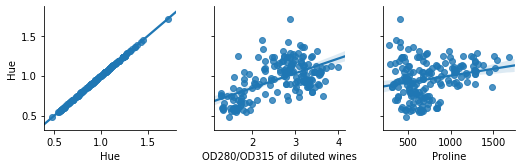

In [602]:
#The visualization of the all features against Hue.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Hue', x_vars = xy.columns[i:i+5],kind="reg" )

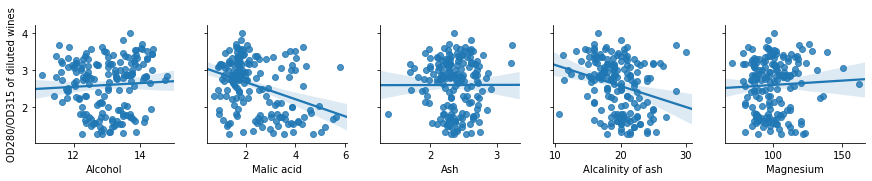

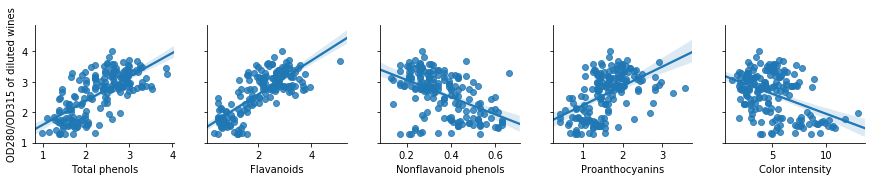

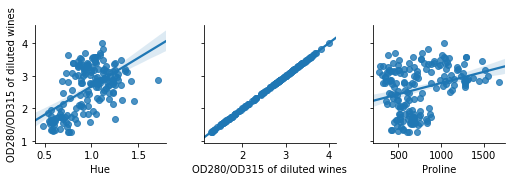

In [603]:
#The visualization of the all features against OD280/OD315 of diluted wines.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='OD280/OD315 of diluted wines', x_vars = xy.columns[i:i+5],kind="reg" )

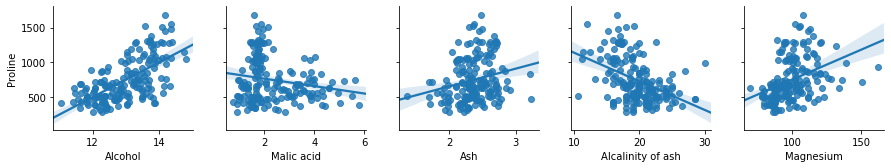

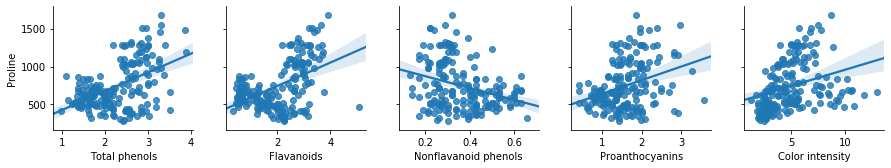

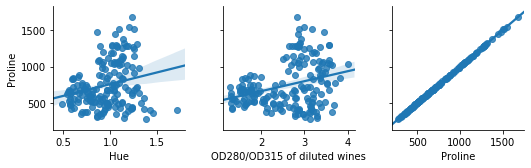

In [604]:
#The visualization of the all features against Proline.
for i in range(0, len(xy.columns),5):
    sns.pairplot(xy, y_vars ='Proline', x_vars = xy.columns[i:i+5],kind="reg" )

### Chemical components Visualization for cultivars

To answer the first question, <b> Can we identify a Cultivar by analyzing its feature(s)?</b> we'll visualize the dataset's attributes based on the cultivar. Eache visulization will indicate the samples of wine by cultivar. The visualization will give distribution of features for each of our three cultivars. 

### Bar Graph Visualization

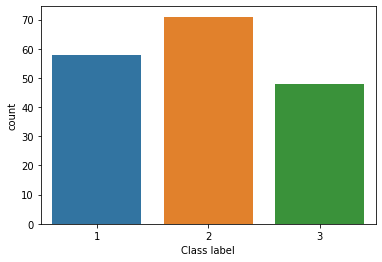

In [605]:
sns.countplot(wine_df['Class label']);

Bar graph is a great tool for quickly assessing the probability distribution of a sample data. It is simple to understand. Python offers a myriad of tools that allow us to create bargraphs using in-built functions.Here we will use matplotlib's pyplot for our bar graph.

Seaborns countplot produces a bar plot showing the distribution of our nominal Class label samples 1,2,3. Noticeable is the class label 2 which is having more samples in our dataset. 

#### Box-plots visualization
credits:1. [Seaborn](https://seaborn.pydata.org/), 2. [GeeksforGeek](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)

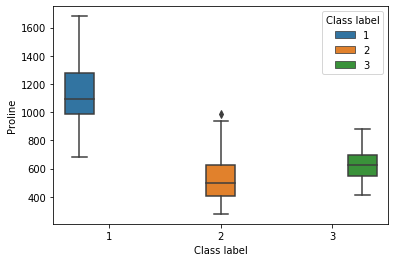

In [606]:
sns.boxplot(x="Class label", y="Proline", hue='Class label', data=wine_df)

The box-plot shows the cultivar-1 has higher average levels of the Proline amino acid and the type 2 to have lower concentration of the Proline amino acid. The upper-quartile concentration amount for the cultivar-1 is 1300 while that of cultivar-2 is 600. The lower-quartile amount of Proline for the cultivar-3 is just above 500 upper-quartile value at 700. 

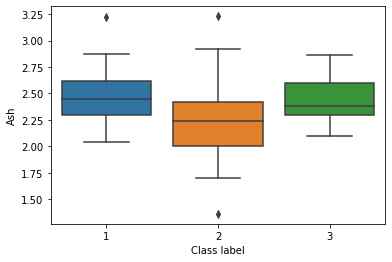

In [607]:
sns.boxplot('Class label', 'Ash', data = wine_df)

The box-plot shows the cultivar-1 and cultivar-3 have similar upper-quartile concentration levels of the Ash (approx. 2.65) with just a slight variation in the median-range. The upper-quartile concentration amount for the cultivar-2 is 2. 35. This means that cultivar-1 and cultivar-3 have similar concentration levels for Ash. 

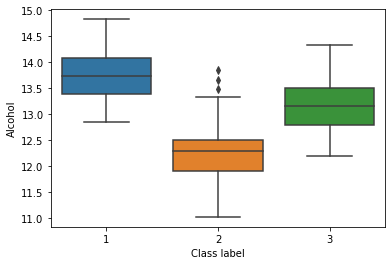

In [608]:
sns.boxplot('Class label', 'Alcohol', data = wine_df)

The box-plot above shows the cultivar-1 has a higher alcohol content than the cultivar-3 and last cultivar-2. cultivar-1 upper-quartile concentration levels of the Alcohol is 14.0 while its lower-quartile levels up with the upper-quartile of cultivar-3 at 13.5. The upper-quartile concentration amount for the cultivar-2 is 12.5. This means that cultivar-1 will likely be identified by the higher alcohol levels. 

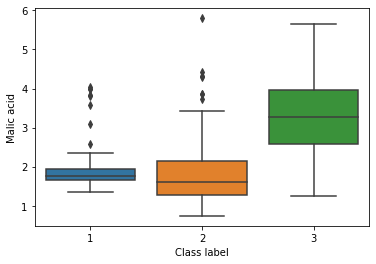

In [609]:
sns.boxplot('Class label', 'Malic acid', data = wine_df)

The box-plot shows the cultivar-1 has the least concentration of Malic acid. Cultivar-3 has the most concentration as indicated by its higher upper-quartile concentration levels of 4.0. This means that cultivar-3 is mostly identified by the higher levels of Malic acid. 

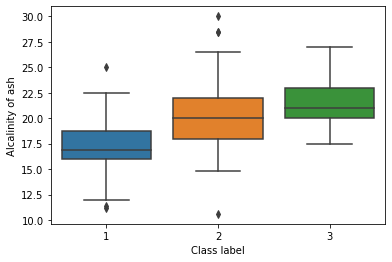

In [610]:
sns.boxplot('Class label', 'Alcalinity of ash', data = wine_df)

The box-plot shows cultivar-3 has a higher upper-quartile concentration levels in alcanicity of Ash and therefore means that that cultivar-3 types of wine are identified by those that have a high alcanicity of ash concentration. 

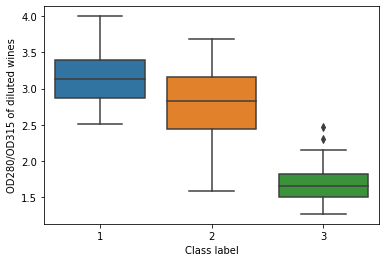

In [611]:
sns.boxplot('Class label', 'OD280/OD315 of diluted wines', data = wine_df)

The box-plot shows the cultivar-3 is easily identified by lowest concentration levels of the OD280/OD315 of diluted wines.  Cultivar-2 and Cultivar-1 are close in terms of the concentration levels.

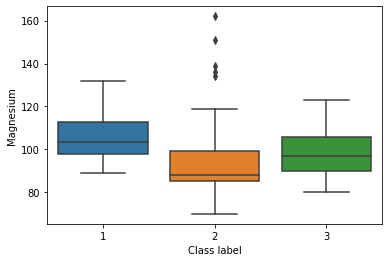

In [612]:
sns.boxplot('Class label', 'Magnesium', data = wine_df)

The box-plot shows the cultivar-1 and cultivar-3 higher magnesium levels and wines with levels above 100 in magnesium concentration are either Cultivar-1 or Cultivar-3. The least concentration is Cultivar-2. 

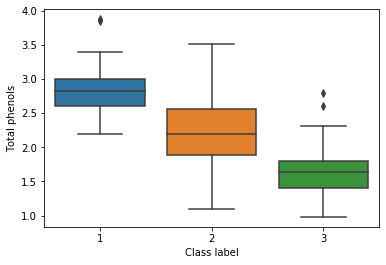

In [613]:
sns.boxplot('Class label', 'Total phenols', data = wine_df)

The box-plot shows that cultivar-3 samples have the least phenols concentration compared to Cultivar-1 and Cultivar-2 which have higher concentrations. We can identify cultivar-3 by the low levels of phenols. 

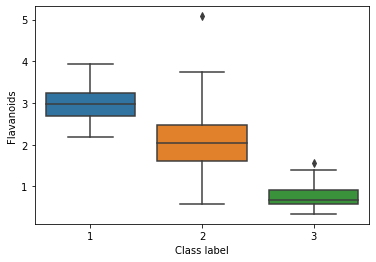

In [614]:
sns.boxplot('Class label', 'Flavanoids', data = wine_df)

Like in Total phenols, this box-plot shows that cultivar-3 lower levels of flavanoids than Cultivar-1 and Cultivar-2.

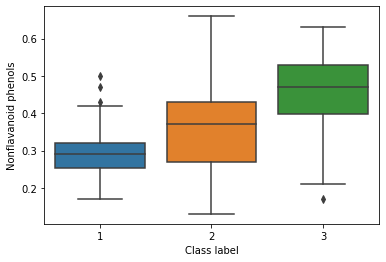

In [615]:
sns.boxplot('Class label', 'Nonflavanoid phenols', data = wine_df)

The box-plot above shows that cultivar-3 has the highest Nonflavanoid phenols. This is accurate considering the levels of Flavanoids and Phenols concentrations of wine samples from Cultivar-3 have all low concentration amounts. 

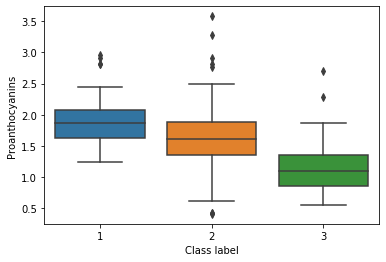

In [616]:
sns.boxplot('Class label', 'Proanthocyanins', data = wine_df)

The box-plot shows the cultivar-1 has the higher upper-quartile concentration levels of Proanthocyanins (approx. 2.2). The lowest concentration of the same are wine samples from Cultivar-3. 

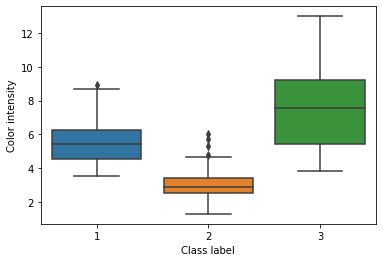

In [617]:
sns.boxplot('Class label', 'Color intensity', data = wine_df)

The box-plot shows the cultivar-3 samples have a higher upper-quartile range meaning the Cultivar-3 have more color intensity levels of all the other Cultivars. 

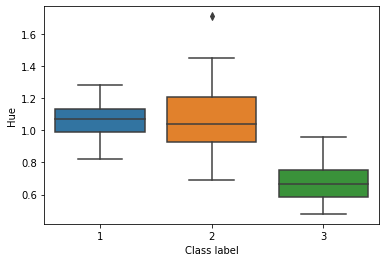

In [618]:
sns.boxplot('Class label', 'Hue', data = wine_df)

The box-plot shows the cultivar-3 has the lowest hue range than Cultivar-1 and cultivar-3. Therefore, wine samples with less hue identify Cultivar-3 samples of wine. 

Our boxplots have been able to assist us in answering question one of the research questions about which features are linked to which Cultivar. 

### Research Question 2

<b> What is the correlation of features by Cultivar?</b>
To help us determine the answer to our second research question, we will do a correlation analysis by cultivar.  
#### Correlation identifying Cultivars



In [619]:
wine_df1 = wine_df.copy()
wine_df1['Class label'] = wine_df['Class label'].astype(int)

In [620]:
wine_df1.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

In [621]:
wine_df1['Cultivar1'] = wine_df1['Class label'] == 1
wine_df1['Cultivar2'] = wine_df1['Class label'] == 2
wine_df1['Cultivar3'] = wine_df1['Class label'] == 3

corrVariables = ['Cultivar1', 'Cultivar2', 'Cultivar3', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

cultivars_df = wine_df1[corrVariables]

# Correlation
corr = cultivars_df.corr().round(2)
corr = corr[['Cultivar1', 'Cultivar2', 'Cultivar3']]
cultivarCorr = corr.drop(['Cultivar1', 'Cultivar2', 'Cultivar3'], axis = 0)
cultivarCorr

,Cultivar1,Cultivar2,Cultivar3
Alcohol,0.64,-0.73,0.12
Malic acid,-0.20,-0.30,0.54
Ash,0.23,-0.36,0.16
Alcalinity of ash,-0.52,0.18,0.35
Magnesium,0.32,-0.29,-0.01
Total phenols,0.61,-0.04,-0.60
Flavanoids,0.67,0.05,-0.76
Nonflavanoid phenols,-0.41,0.01,0.42
Proanthocyanins,0.37,0.06,-0.46
Color intensity,0.14,-0.69,0.62


The correlation data results we have run its to help in identifying the cultivar correlation by chemical properties. We are just showing the results given by our earlier boxplots visualizations of the chemicals components of each cultivar. The visualization below gives a representation of the above results.

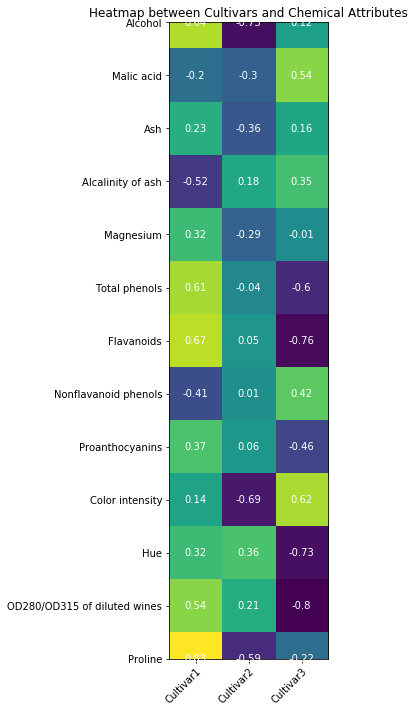

In [622]:
# Heatmap of the correlation matrix above
heatmapRows = ['Cultivar1', 'Cultivar2', 'Cultivar3']
heatmapCols = ['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

fig, ax = plt.subplots(figsize=(5,10))
im = ax.imshow(cultivarCorr, interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(heatmapRows)))
ax.set_yticks(np.arange(len(heatmapCols)))
# ... and label them with the respective list entries
ax.set_xticklabels(heatmapRows)
ax.set_yticklabels(heatmapCols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(heatmapCols)):
    for j in range(len(heatmapRows)):
        text = ax.text(j, i, cultivarCorr.iloc[i][j], ha="center", va="center", color="w")
        
ax.set_title("Heatmap between Cultivars and Chemical Attributes")
fig.tight_layout()
plt.show()

## Modelling

This section will help us answer the third part of our research question. 
Before our data can be used for machine learning modelling, it needs to be prepared in a suitable manner for the easy application of the algorithms. This process is what the Data Cleaning and Preprocesing steps entail. 
Data preprocessing is the first and most critical step. You get to find out about your dataset, and evaluate it for missing values and appropriately decide whether to eliminate or to  replace the missing data. 

The <b >scikit-learn</b> has loads of features like the imputer class from its <b> preprocessing model </b> to help an appropriate scenario where we do not want delete records but just replace them with values like mean of the samples available. Its just right! And its good if we intend to have enough data for training our machine learning algorithms. 

credits: [towardsdatascience](https://towardsdatascience.com/the-complete-beginners-guide-to-data-cleaning-and-preprocessing-2070b7d4c6d)

### Crawling our dataset for NaN
Identifying if there are (NaN) Not a Number in our dataset is quite easy in Python. The <b>isnull</b> method is helpful for our goal which is to return our DataFrame with Boolean values that indicate whether a cell contains a numeric value ( False ) or if data is missing ( True ). The <b>sum</b> method returns the number of missing values per column: We do this as shown:

In [623]:
wine_df1.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Cultivar1                       0
Cultivar2                       0
Cultivar3                       0
dtype: int64

Our dataset has no NaN values and that will be helpful in producing a reliable account for the models

## Modelling Techniques

1. We assign the feature columns 1-13 to the variable X, and the class labels from the first column to the variable y. 
2. Next we use the train_test_split function to randomly split X and y into separate training and test datasets.
3. Setting test_size=0.3 , we assign 30 percent of the wine samples to X_test and y_test. This means the remaining 70 percent of the samples are assigned to X_train and y_train , respectively. 
4. Providing the class label array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the original dataset. 

credits: Python Machine Learning

### Partitoning the dataset
We are going to randomly partition this dataset into separate test and training datasets. We are going to use the <b>train_test_split</b> function from <b>scikit-learn's model_selection</b> submodule:

### Classifiers : K-Nearest Neighbors (KNN)
The KNN algorithm is simple and can be summarized by the following steps:
1. Choose the number of k and a distance metric.
2. Find the k-nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote.

Credits: Python Machine Learning

In [624]:
from sklearn.model_selection import train_test_split
X = wine_df.drop('Class label', axis=1)
y = wine_df['Class label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0,stratify=y)

In [625]:
# implement a KNN model in scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
np.random.seed(64) # initialize a random seed, this will help us make the random stuff reproducible.
model = KNeighborsClassifier() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('score on training set:', model.score(X_train, y_train))
print('score on test set:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))
#print("Train - Accuracy :", metrics.accuracy_score(y_train, model.predict(X_train)))
#print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, model.predict(X_train)))

score on training set: 0.8373983739837398
score on test set: 0.6481481481481481
              precision    recall  f1-score   support

           1       0.70      0.78      0.74        18
           2       0.72      0.59      0.65        22
           3       0.50      0.57      0.53        14

    accuracy                           0.65        54
   macro avg       0.64      0.65      0.64        54
weighted avg       0.66      0.65      0.65        54



<b> Analyzing our results:</b>
We first notice that our model is overfitting because of the higher score of the training set result than on the test set. This is an indicator of overfitting. We also need to improve the prediction for our class labels 1,2,3. 

### Overfitting
Overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset, but does not generalize well to new data meaning: this model has a high variance. 

The reason for the overfitting is that our model is too complex for the given training data. How to solve? 

Common solutions to reduce the generalization error are listed as follows:
1. Collect more training data
2. Introduce a penalty for complexity via regularization
3. Choose a simpler model with fewer parameters
4. Reduce the dimensionality of the data

Case 1,2 are not feasible in our wine case study. 

### Dimensionality Reduction. 
Dimensionality reduction using feature selection.

Credits: Python Machine Learning

### Normalizing our model
Back to our code, we need to normalize or standardize our model to help with overfitting. Mean normalization method, involves subtracting the feature's mean and dividing by it's standard deviation. With this, we are converting each data point to it's Z-score.

"Pipeline" is provided in sklearn as an inbuilt function and while help in solving the overfitting scenario.

In [626]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline(
    [
        ('scaler', StandardScaler()), # mean normalization
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ]
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('score on training set:', model.score(X_train, y_train))
print('score on test set:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 1.0
score on test set: 0.9629629629629629
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.91      0.95        22
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



Our model is much improved as the test score is fairly boosted compared to the earlier result. 

### Feature selection

I'll apply feature selection on the highly correlating features in our dataset and this will involve the removal of one of the correlating features.

Our feature correlation plot from our visualization showed that 'Total_phenols' and 'Flavanoids' are closely correlating features. Let's see it below:

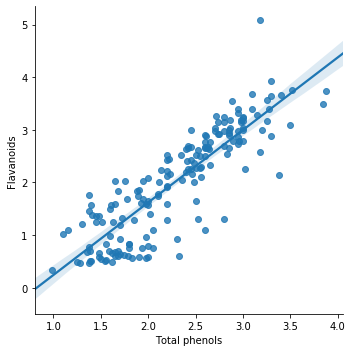

In [627]:
sns.lmplot(x='Total phenols', y ='Flavanoids', data=wine_df1, fit_reg=True)

#### The inevitable
In order to produce a strong prediction we will not use the all two features highly correlated features. We will drop one.  

In [628]:
X.drop('Total phenols', axis=1, inplace =True) # delete one of the correlating features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) # split the data again

#fit the same model again and print the scores
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('score on training set:', model.score(X_train, y_train))
print('score on test set:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))


score on training set: 1.0
score on test set: 0.9111111111111111
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       1.00      0.78      0.88        18
           3       0.92      1.00      0.96        12

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.91        45
weighted avg       0.92      0.91      0.91        45



<b> Analyzing our results:</b>
We still notice that our model is overfitting because of the higher score of the training set result than on the test set. However, our class label prediction precision is improved greatly from removing one of the highly correlated features in our dataset. We can still improve our testing set value and remove the problem of overfitting in our model. We will use another supervised algorithm called Random Forest. 

### Random Forest

Random Forest algorithm ranks features in the dataset by importance. The criteria for choosing important features is by selecting the features that help the most to distinguish between the target labels. 

Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not.

<b>Credit: Python Machine Learning: (Packt) </b>

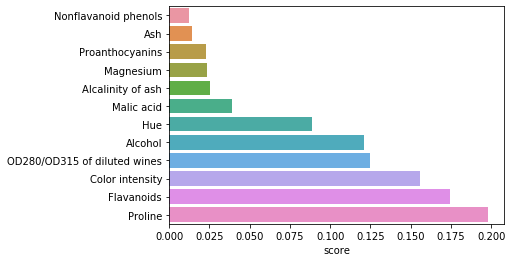

In [629]:
from sklearn.ensemble import RandomForestClassifier

model_feature_importance = RandomForestClassifier(n_estimators=500).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X_train.columns)).sort_values('score')
sns.barplot(feature_scores['score'], feature_scores.index)


The Wine dataset features have been ranked by relative importance. 
### Conlusions from the bar-plot
By nature of the features distribution in our bar plot, we can see that from ash to malic acid are least distibuted features. However, the hue, alcohol and OD280/OD315 diffraction features in the dataset are catching the eye with the nature of there distribution.

The feature important scores can be used to put a threshold in our model feature selection function. The scikit-learn implements a SelectFromModel function that also selects features based on a user-specified threshold after model fitting. This "SelectFromModel" takes an estimator and a threshold, extracts from the estimator the feature importance scores and returns only the features with a score above the given threshold.

Credits: Python Machine Learning Packt

In [630]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(64) # initialize a random seed, this will help us make the random stuff reproducible.

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ]
)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print('score on training set:', model.score(X_train, y_train))
print('score on test set:', model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 1.0
score on test set: 0.9555555555555556
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The test set precision for our model is slightly improved from 0.91 previously, to 0.96. This slight optimization of our model is significant, and the class labels precision indicates the  success in optimizing the model. From our output the results indicates an improvement

### Decision Tree Classifier
Decision Trees is also a commonly used classification method. The tree consists of nodes with a “root” node at the top and is the start of the tree. Decision trees involves breaking down individual tests (if-then) which begin at the base node and traverse the tree, depending on the result of the test in that particular node. From the root node the tree branches or forks out to internal nodes.

In [631]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth = 2)
# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("score on training set: ",model.score(X_train, y_train))
print("score on testing set: ", model.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set:  0.946969696969697
score on testing set:  0.8
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#### Conclusion: 
 

The KNN model produced a training score of 0.83, testing score of 0.64 with a cultivar prediction precision of 1=0.70, 2= 0.72, 3=0.50 

Upon normalizing and feature selection to minimize overfitting, The KNN model produced a better training score of 1.0, and testing score of 0.91 with a cultivar prediction precision of 1=0.83, 2=1.0, 3=0.92 also recording an improvement. However, feature selection reduced the overfiting. 

Applying the RandomForest algorithm helped to identify important features of our wine dataset. Using this algorithm with the KNN classifier model produced the following: 
The model produced a training score of 1.0, testing score of 0.95 with a cultivar prediction precision of 1=0.88, 2= 1.0, 3=1.0 meaning the prediction was improved for the cultivar.

The Decision Tree model produced a training score of 0.95, testing score of 0.8 with a cultivar prediction precision of 1=0.88, 2= 1.0, 3=1.0  